<a href="https://colab.research.google.com/github/cyb00263/test01/blob/main/dqn_tictactoe_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing dependencies
!apt-get -qq -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1 > /dev/null
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null

!pip -q install gym
!pip -q install pyglet
!pip -q install pyopengl
!pip -q install pyvirtualdisplay

# Start virtual display
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
#os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'


In [2]:
!pip install tensorflow==1.14
!pip install keras==2.2.4
!pip install keras-rl==0.4.2

In [3]:
import math
import gym
from gym import spaces, logger
from gym.utils import seeding
import numpy as np
import copy
import random

class Practice(gym.core.Env):
    def __init__(self):
        self.n_action = 5*5
        self.board = [0] * self.n_action
        self.action_space = gym.spaces.Discrete(self.n_action) # actionの取りうる値
        self.observation_space = gym.spaces.Box(low=-1, high =1, shape=(self.n_action,)) 
        self.result = []

    def step(self, action):
      self.board, end_flg, reward = self.get_input(self.board, action)
      done = end_flg
      info = {}

      return self.board, reward, done, info

    def get_input(self, board, action):
      end_flg = 0
      reward = 0
      #AI#
      space = [i for i, x in enumerate(board) if x == 0 ]
      if action in space:
        flg = 1
        board[action] = flg
        end_flg, reward = self.judge(board)
        if end_flg == 0:
          space = [i for i, x in enumerate(board) if x == 0 ]
          ransu = int(random.choice(space))
          flg = -1
          board[ransu] = flg
          end_flg, reward = self.judge(board)
          if end_flg == 1:
            reward = -5
            self.result.append(reward)
      else:
        end_flg = 1
        reward = -5
        self.result.append(reward)

      return board, end_flg, reward

    def judge(self, board):
      end_flg = 0
      reward = 0
      mass = 5
      moku = 5
      score = []

      space = [i for i, x in enumerate(board) if x == 0 ]
      if len(space) == 0:
        end_flg = 1
        reward = 0
      else:
        board = np.array(board).reshape(5,5)
        for i in range(mass-moku+1):
          for j in range(mass-moku+1):
            for k in range(moku):
              score_r = board[i][j+k] + board[i+1][j+k] + board[i+2][j+k] + board[i+3][j+k] + board[i+4][j+k]
              score.append(score_r)
              score_c = board[i+k][j] + board[i+k][j+1] + board[i+k][j+2] + board[i+k][j+3] + board[i+k][j+4]
              score.append(score_c)
            score_dl = board[i][j] + board[i+1][j+1] + board[i+2][j+2] + board[i+3][j+3] + board[i+4][j+4]
            score.append(score_dl)
            score_dr = board[i][j+4] + board[i+1][j+3] + board[i+2][j+2] + board[i+3][j+1] + board[i+4][j]
            score.append(score_dr)
        if max(score) == 5:
          end_flg = 1
          reward = 25
        elif min(score) == -5:
          end_flg = 1
          reward = -5
        else:
          reward = min(score)/5

      return end_flg, reward


    def reset(self):
        self.board = [0] * self.n_action
        return self.board

    def render(self, mode):
        pass

    def close(self):
        pass

    def seed(self):
        pass

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

practice = Practice()
n_action = 5*5

# ニューラルネットワークの構造を定義
model = Sequential()
model.add(Flatten(input_shape=(1,) + practice.observation_space.shape))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(n_action))
model.add(Activation('linear'))
print(model.summary()) # モデルの定義をコンソールに出力
 
# モデルのコンパイル
memory = SequentialMemory(limit=50000, window_length=1)
policy = BoltzmannQPolicy(tau=1.)
dqn = DQNAgent(model=model, nb_actions=n_action, memory=memory, nb_steps_warmup=50, target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3328      
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                3225      
_________________________________________________________________
activation_2 (Activation)    (None, 25)                0         
Total params: 6,553
Trainable params: 6,553
Non-trainable params: 0
_________________________________________________________________
None





Training for 500000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 50s 5ms/step - reward: -1.1234
1755 episodes - episode_reward: -6.399 [-10.600, 24.000] - loss: 1.084 - mean_absolute_error: 2.337 - mean_q: 0.247

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 49s 5ms/step - reward: 0.0191
1326 episodes - episode_reward: 0.142 [-12.600, 24.200] - loss: 1.799 - mean_absolute_error: 3.632 - mean_q: 4.314

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 48s 5ms/step - reward: 1.3726
1188 episodes - episode_reward: 11.554 [-12.600, 24.200] - loss: 3.089 - mean_absolute_error: 10.467 - mean_q: 15.631

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 50s 5ms/step - reward: 1.7969
1244 episodes - episode_reward: 14.444 [-12.600, 24.400] - loss: 3.118 - mean_absolute_error: 12.287 - mean_q: 17.522

Interval 5 (40000 steps performed)
10000/10000 [======

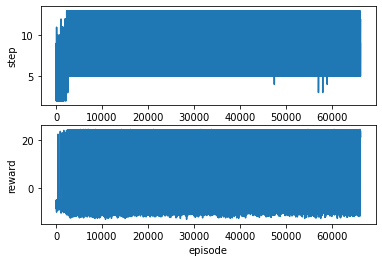

In [5]:
import matplotlib.pyplot as plt

# fit の結果を取得しておく
history = dqn.fit(practice, nb_steps=500000, visualize=False, verbose=1)

dqn.save_weights('dqn_{}_weights.h5f'.format("TicTacToe"), overwrite=True)

# 結果を表示
plt.subplot(2,1,1)
plt.plot(history.history["nb_episode_steps"])
plt.ylabel("step")

plt.subplot(2,1,2)
plt.plot(history.history["episode_reward"])
plt.xlabel("episode")
plt.ylabel("reward")

plt.show()  # windowが表示されます。

In [6]:
import rl.callbacks
 
# ログを記録するためのクラスの定義
class EpisodeLogger(rl.callbacks.Callback):
    def __init__(self):
        self.rewards = {}
    def on_episode_begin(self, episode, logs):
        self.rewards[episode] = []
    def on_step_end(self, step, logs):
        episode = logs['episode']
        self.rewards[episode].append(logs['reward'])
 
episode_logger = EpisodeLogger()
nb_episodes = 100
dqn.test(practice, nb_episodes=nb_episodes, visualize=False, callbacks=[episode_logger])

Testing for 100 episodes ...
Episode 1: reward: 23.800, steps: 6
Episode 2: reward: 24.000, steps: 5
Episode 3: reward: 23.600, steps: 5
Episode 4: reward: 23.800, steps: 5
Episode 5: reward: 23.600, steps: 5
Episode 6: reward: 23.000, steps: 7
Episode 7: reward: 24.200, steps: 5
Episode 8: reward: 23.800, steps: 5
Episode 9: reward: 23.800, steps: 5
Episode 10: reward: 24.000, steps: 5
Episode 11: reward: 24.000, steps: 5
Episode 12: reward: 24.200, steps: 5
Episode 13: reward: 23.800, steps: 6
Episode 14: reward: 23.000, steps: 7
Episode 15: reward: 24.200, steps: 5
Episode 16: reward: 24.000, steps: 5
Episode 17: reward: 23.800, steps: 5
Episode 18: reward: 23.600, steps: 5
Episode 19: reward: 24.000, steps: 5
Episode 20: reward: 23.000, steps: 6
Episode 21: reward: 22.800, steps: 7
Episode 22: reward: 23.600, steps: 5
Episode 23: reward: 24.200, steps: 5
Episode 24: reward: 24.200, steps: 5
Episode 25: reward: 23.800, steps: 5
Episode 26: reward: 23.600, steps: 6
Episode 27: reward

In [7]:
import math
import gym
from gym import spaces, logger
from gym.utils import seeding
import numpy as np
import copy
import random

class Match(Practice):
    def __init__(self):
        self.n_action = 5*5
        self.board = [0] * self.n_action
        self.action_space = gym.spaces.Discrete(self.n_action) # actionの取りうる値
        self.observation_space = gym.spaces.Box(low=-1, high =1, shape=(self.n_action,)) 

    def step(self, action):
      self.board, end_flg, reward = self.get_input(self.board, action)
      done = end_flg
      info = {}
      return self.board, reward, done, info

    def get_input(self, board, action):
      end_flg = 0
      reward = 0
      #AI#
      space = [i for i, x in enumerate(board) if x == 0 ]
      if action in space:
        flg = 1
        board[action] = flg
        end_flg, reward = self.judge(board)
        if end_flg == 1:
          reward = -1
          print("Win")
        #human#
        else:
          print('\n')
          print(str(board[0]) + '|' + str(board[1]) + '|' + str(board[2]) + '|' + str(board[3]) + '|' + str(board[4]))
          print("---------")
          print(str(board[5]) + '|' + str(board[6]) + '|' + str(board[7]) + '|' + str(board[8]) + '|' + str(board[9]))
          print("---------")
          print(str(board[10]) + '|' + str(board[11]) + '|' + str(board[12]) + '|' + str(board[13]) + '|' + str(board[14]))
          print("---------")
          print(str(board[15]) + '|' + str(board[16]) + '|' + str(board[17]) + '|' + str(board[18]) + '|' + str(board[19]))
          print("---------")
          print(str(board[20]) + '|' + str(board[21]) + '|' + str(board[22]) + '|' + str(board[23]) + '|' + str(board[24]))
          print('\n')
          space = [i for i, x in enumerate(board) if x == 0 ]
          print(space)
          human = input()
          flg = -1
          board[int(human)] = flg
          end_flg, reward = self.judge(board)
          if end_flg == 1:
            reward = -1
            print("Win")
      else:
        end_flg = 1
        reward = -1

      return board, end_flg, reward
   
    def reset(self):
        self.board = [0] * self.n_action
        return self.board

    def render(self, mode):
        pass

    def close(self):
        pass

    def seed(self):
        pass

In [9]:
match = Match()
import rl.callbacks
 
nb_episodes = 1
dqn.test(match, nb_episodes=nb_episodes, visualize=False)

Testing for 1 episodes ...


0|0|0|0|0
---------
0|0|0|0|0
---------
0|0|1|0|0
---------
0|0|0|0|0
---------
0|0|0|0|0


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
0


-1|0|0|0|0
---------
0|0|1|0|0
---------
0|0|1|0|0
---------
0|0|0|0|0
---------
0|0|0|0|0


[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
1


-1|-1|0|0|0
---------
0|0|1|0|0
---------
0|0|1|0|0
---------
0|0|1|0|0
---------
0|0|0|0|0


[2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24]
2


-1|-1|-1|0|0
---------
0|0|1|1|0
---------
0|0|1|0|0
---------
0|0|1|0|0
---------
0|0|0|0|0


[3, 4, 5, 6, 9, 10, 11, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24]
3


-1|-1|-1|-1|0
---------
1|0|1|1|0
---------
0|0|1|0|0
---------
0|0|1|0|0
---------
0|0|0|0|0


[4, 6, 9, 10, 11, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24]
4
Win
Episode 1: reward: -3.000, steps: 5
